<a href="https://colab.research.google.com/github/Parinita-Jain/ML_LectureNotes/blob/main/NaiveBayesOnIrisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import statistics as stat

In [53]:
colname=["sepal_length","sepal_width","petal_length","petal_width","species"]
data=pd.read_csv("iris.csv",sep=",",names=colname)

In [54]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [56]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


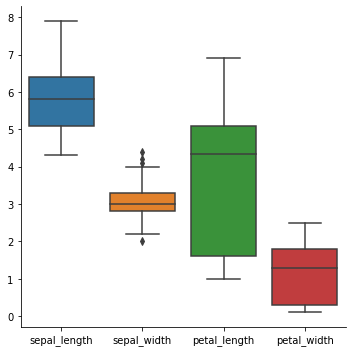

In [57]:
sns.catplot(data=data,kind='box' )

In [58]:
iqr = data['sepal_width'].quantile(0.75) - data['sepal_width'].quantile(0.25) 
print('iqr = ',iqr)
up = data['sepal_width'].quantile(0.75) + 1.5 * iqr
down = data['sepal_width'].quantile(0.25) - 1.5 * iqr
print('up = {} , down = {}'.format(up,down))
sepalw = data['sepal_width']

outlier = []
for i in sepalw:
    if i > up:
        print('outliner up ',i)
        outlier.append(i)

for i in sepalw:
    if i < down:
        print('outliner down ',i)
        outlier.append(i)
        

iqr =  0.5
up = 4.05 , down = 2.05
outliner up  4.4
outliner up  4.1
outliner up  4.2
outliner down  2.0


In [59]:
data.sepal_width = data.sepal_width.replace(outlier,data.sepal_width.mean())

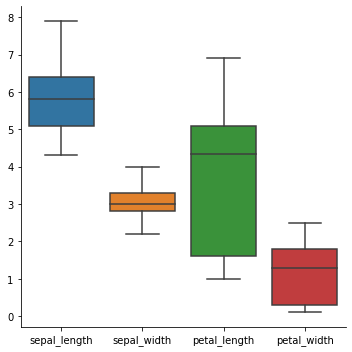

In [60]:
sns.catplot(data=data,kind='box' )

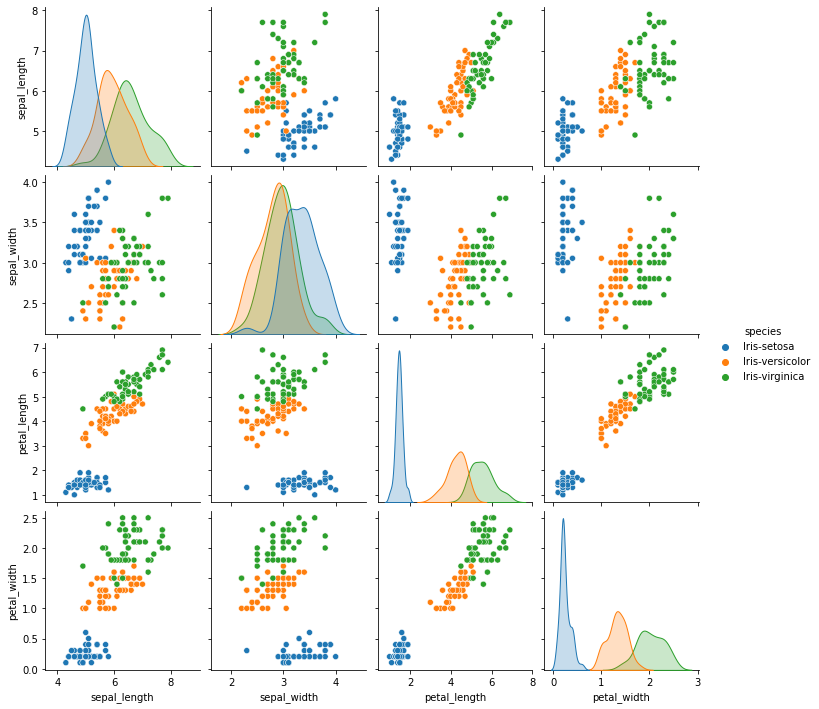

In [61]:
sns.pairplot(data,hue='species')

In [62]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [63]:
species = data['species']
data = data.drop(['species'],axis = 1)

In [64]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [65]:
X = data
y = species

In [66]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [67]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [68]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

from sklearn import metrics 

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
 

Gaussian Naive Bayes model accuracy(in %): 100.0


In [69]:
tr=gnb.score(X_train,y_train)
te=gnb.score(X_test,y_test)
print(tr)
print(te)

0.9428571428571428
1.0


In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [71]:
clf = MultinomialNB()
y_predm = clf.fit(X_train, y_train).predict(X_test)


print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_predm)*100)
 
tr=clf.score(X_train,y_train)
te=clf.score(X_test,y_test)
print(tr)
print(te)

Multinomial Naive Bayes model accuracy(in %): 60.0
0.7142857142857143
0.6


In [72]:
clf = BernoulliNB()
y_predm = clf.fit(X_train, y_train).predict(X_test)

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

tr=clf.score(X_train,y_train)
te=clf.score(X_test,y_test)
print(tr)
print(te)
 

Gaussian Naive Bayes model accuracy(in %): 100.0
0.37142857142857144
0.24444444444444444
